<a href="https://www.kaggle.com/code/kbhuvana202006/task-4?scriptVersionId=296387805" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/leapgestrecog


In [2]:
import os

base_path = "/kaggle/input/leapgestrecog"
print(os.listdir(base_path))

import os

base_path = "/kaggle/input/leapgestrecog/leapGestRecog"
print(os.listdir(base_path))


['leapGestRecog', 'leapgestrecog']
['07', '05', '06', '02', '04', '00', '08', '09', '03', '01']


In [3]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


2026-02-07 13:28:50.937004: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770470931.185190      17 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770470931.262500      17 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770470931.870448      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770470931.870530      17 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770470931.870543      17 computation_placer.cc:177] computation placer alr

In [4]:
IMG_SIZE = 64
data = []
labels = []

label_map = {str(i).zfill(2): i for i in range(10)}  # '00' → 0, '01' → 1 ...

base_path = "/kaggle/input/leapgestrecog/leapGestRecog"

for gesture in os.listdir(base_path):
    gesture_path = os.path.join(base_path, gesture)
    
    for subject in os.listdir(gesture_path):
        subject_path = os.path.join(gesture_path, subject)
        
        for img_name in os.listdir(subject_path):
            img_path = os.path.join(subject_path, img_name)
            
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img)
            labels.append(label_map[gesture])

print("Total samples loaded:", len(data))
print("Classes:", label_map)


Total samples loaded: 20000
Classes: {'00': 0, '01': 1, '02': 2, '03': 3, '04': 4, '05': 5, '06': 6, '07': 7, '08': 8, '09': 9}


In [5]:
X = np.array(data).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = to_categorical(labels, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (16000, 64, 64, 1)
Test: (4000, 64, 64, 1)


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-07 13:33:56.851436: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 45s 88ms/step - accuracy: 0.6281 - loss: 1.0729 - val_accuracy: 0.9862 - val_loss: 0.0294
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 88ms/step - accuracy: 0.9764 - loss: 0.0674 - val_accuracy: 0.9868 - val_loss: 0.0199
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9851 - loss: 0.0382 - val_accuracy: 0.9890 - val_loss: 0.0178
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9854 - loss: 0.0321 - val_accuracy: 0.9895 - val_loss: 0.0164
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.9897 - loss: 0.0234 - val_accuracy: 0.9898 - val_loss: 0.0164
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9893 - loss: 0.0215 - val_accuracy: 0.9910 - val_loss: 0.0155
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9886 - loss: 0.0235 - val_accuracy: 0.9927 - val_loss: 0.0150
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.9894 - loss: 0.0201 - 

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9916 - loss: 0.0143
Test Accuracy: 0.9902499914169312


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

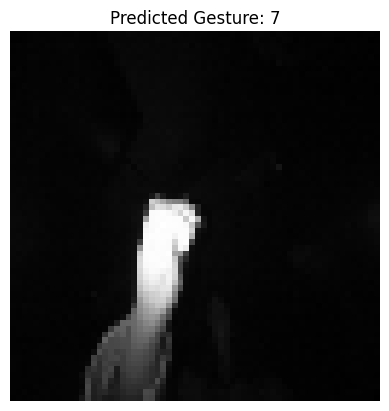

In [9]:
idx = np.random.randint(0, len(X_test))
prediction = model.predict(X_test[idx:idx+1])

plt.imshow(X_test[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
plt.title(f"Predicted Gesture: {np.argmax(prediction)}")
plt.axis('off')


In [10]:
gesture_names = {
    0: "Palm",
    1: "L Shape",
    2: "Fist",
    3: "Fist Moved",
    4: "Thumb",
    5: "Index",
    6: "OK",
    7: "Palm Moved",
    8: "C Shape",
    9: "Down"
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

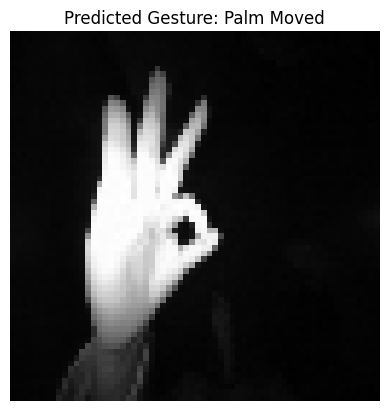

In [11]:
idx = np.random.randint(0, len(X_test))
prediction = model.predict(X_test[idx:idx+1])
predicted_class = np.argmax(prediction)

plt.imshow(X_test[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
plt.title(f"Predicted Gesture: {gesture_names[predicted_class]}")
plt.axis('off')


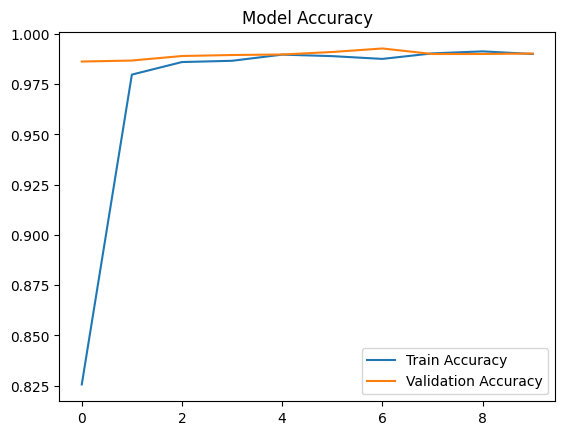

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()
